# Prediccion del precio de las viviendas con machine learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Ruta del archivo para leer
iowa_file_path = '/content/drive/MyDrive/Machine_learning_python/train.csv'

# Leo el archivo
home_data = pd.read_csv(iowa_file_path)


In [3]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#Imprimo la lista de columnas en el conjunto de datos para encontrar el nombre
# del objetivo de predicción

home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Defino la varible de prediccion
y = home_data.SalePrice


Dado que solo desea algunas columnas de los datos originales, primero creará una lista con los nombres de las columnas que desea en X.

Uso solo las siguientes columnas en la lista:
* YearBuilt
* 1stFlrSF
* 2ndFlrSF
* FullBath
* BedroomAbvGr
* TotRmsAbvGrd


In [6]:
# Crea la lista de feature
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

# Seleccione los datos correspondientes a las feature
X = home_data[feature_names]

print(X.head)

<bound method NDFrame.head of       LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0        8450       2003       856       854         2             3   
1        9600       1976      1262         0         2             3   
2       11250       2001       920       866         2             3   
3        9550       1915       961       756         1             3   
4       14260       2000      1145      1053         2             4   
...       ...        ...       ...       ...       ...           ...   
1455     7917       1999       953       694         2             3   
1456    13175       1978      2073         0         2             3   
1457     9042       1941      1188      1152         2             4   
1458     9717       1950      1078         0         1             2   
1459     9937       1965      1256         0         1             3   

      TotRmsAbvGrd  
0                8  
1                6  
2                6  
3                7  


## DecisionTreeReegor

In [7]:
# Importo la libreria
from sklearn.tree import DecisionTreeRegressor

# Especifico el modelo
# Establezco un valor numérico para Random_State al especificar el modelo
iowa_model = DecisionTreeRegressor(random_state=1)

# Realizo el ajuste
iowa_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Hago predicciones del modelo usando X como datos. Guardo los resultados en una variable llamada predicciones.

In [8]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [9]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [10]:
predictions[:5]

array([208500., 181500., 223500., 140000., 250000.])

Es natural preguntar cuán precisas serán las predicciones del modelo y cómo puede mejorar eso.

Para esto vamos a usar la función Train_Test_Split para dividir los datos.

In [11]:
# Importo la función Train_Test_Split
from sklearn.model_selection import train_test_split
# defino los datos de entrenamiento y de validacion
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)




Creo un modelo de DecisionTreeReegor y ajusto a los datos relevantes.

In [12]:
# Specify the model
iowa_model = DecisionTreeRegressor(random_state = 1)

# Fit iowa_model with the training data.
iowa_model.fit(train_X, train_y)


DecisionTreeRegressor(random_state=1)

In [13]:
# Hago predicciones con datos de validación

val_predictions = iowa_model.predict(val_X)

In [14]:
# Imprimo las pocas predicciones

print(val_predictions[:5])

# Imprimo los precios reales principales de los datos de validación
print(val_y.head())

[186500. 184000. 130000.  92000. 164500.]
258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64


In [15]:
# Calculo el error absoluto medio en los datos de validación

from sklearn.metrics import mean_absolute_error

val_mae = mean_absolute_error(val_y, val_predictions)

print(val_mae)

29652.931506849316


Veamos como podemos mejorar este error en las predicciones.


In [16]:
# Defino una funcion que me de el error medio
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [17]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
lista= []
# Realizo un bucle para encontrar el tamaño de árbol ideal
for max_leaf_nodes in [5, 25, 50, 100, 250, 500]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    lista.append(my_mae)

# veo cual es el mejor valor
indice= lista.index(min(lista))
best_tree_size = candidate_max_leaf_nodes[indice]


Max leaf nodes: 5  		 Mean Absolute Error:  35044
Max leaf nodes: 25  		 Mean Absolute Error:  29016
Max leaf nodes: 50  		 Mean Absolute Error:  27405
Max leaf nodes: 100  		 Mean Absolute Error:  27282
Max leaf nodes: 250  		 Mean Absolute Error:  27893
Max leaf nodes: 500  		 Mean Absolute Error:  29454


In [18]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# Ajusto el modelo final
final_model.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

Hemos sintonizado este modelo y mejoró los resultados.


Pero todavía estamos utilizando modelos de árboles de decisión, que no son muy sofisticados con los estándares modernos de aprendizaje automático.


## RandomForestRegressor

Para esto vamos a utilizar el modelo de RandomForestRegressor de sklearn

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Defino el modelo
rf_model = RandomForestRegressor(random_state=1)

# Ajusto el modelo
rf_model.fit(train_X, train_y)
melb_preds = rf_model.predict(val_X)

# Calulo el error
rf_val_mae = mean_absolute_error(val_y, melb_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21857.15912981083


Se puede observar que este modele tiene un precision mejor que los anteriores.

Hay muchas maneras de mejorar el modelo, y agregar características es una excelente manera de hacerlo.
Algunas características causarán errores debido a problemas como valores faltantes o tipos de datos no numéricos. Aquí hay una lista completa de columnas potenciales que no arrojarán errores:

'MSSubClass'
,'LotArea'
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch'
,'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold'

## Valores faltantes:

Veamos algunos metodos para trabajar con las columnas que tienen valores faltantes


### **Metodo 1**

Eliminacion de columna mediante el metodo drop:

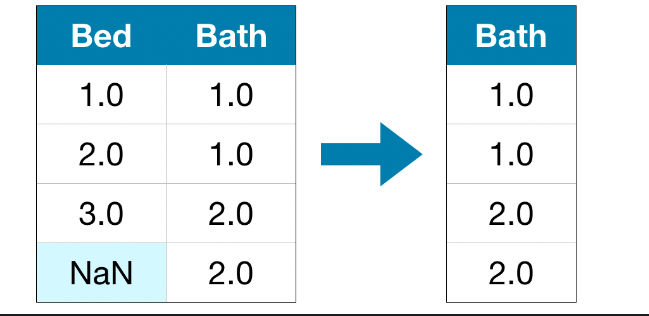





In [20]:
# Leo los archivos de entrenamiento de testeo
X_full = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/train.csv', index_col='Id')
X_test_full = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/test.csv', index_col='Id')

# Eliminos las filas de la variable a precir  con valores faltantes
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Por ahora solamente voy a usar feature con valores numericos dejo afuera las
# varibles categoricas
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])


# ahora vuelvo a definir los datos de entrenamiento y de validacion
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
# Ojo aca tanto los datos de entrenamientos como de validacion en x pueden tener
# valores nulos, por ahora solamente elimiamos los nulos de y

In [21]:
print(X_train.shape)

# veo la cantidad de datos nulos en los conjuntos de entre
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


In [22]:
num_rows = len(X_train)

num_cols_with_missing = len(missing_val_count_by_column[missing_val_count_by_column > 0])

tot_missing =missing_val_count_by_column.sum()
tot_missing

276

In [23]:
# Función para comparar diferentes enfoques
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [24]:
# Obtengo los nombres de columnas con valores faltantes
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Defino los nuevos datos de entrenamiento y de validacion eliminando las
# columnas con valores faltantes
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

In [25]:
# veo el error absoluto medio mediante este metodo de eliminacion de columnas
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17837.82570776256


Dado que hay relativamente pocas entradas faltantes en los datos (la columna con el mayor porcentaje de valores faltantes falta menos del 20% de sus entradas), podemos esperar que la caída de columnas sea poco probable que produzca buenos resultados. Esto se debe a que estaríamos tirando muchos datos valiosos, por lo que la imputación probablemente funcionará mejor.

### **Metodo 2**

Imputacion: llena los valores faltantes por una valor, por ejemplo el valor medio de la columna

# 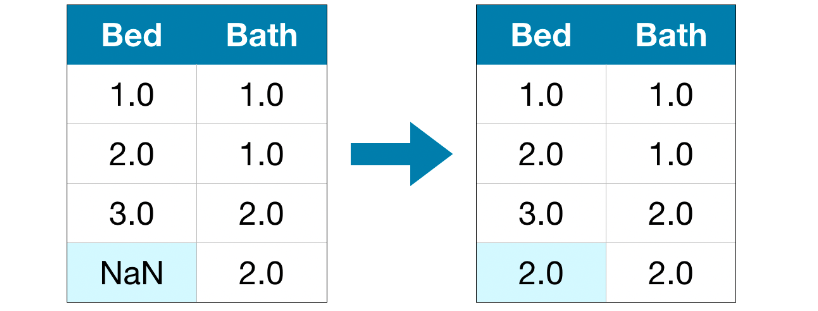

In [26]:
# importo libreria
from sklearn.impute import SimpleImputer

# realizo imputacion de los datos
y_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(y_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(y_imputer.transform(X_valid))



imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns


In [27]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


Dado que hay tan pocos valores faltantes en el conjunto de datos, esperaríamos que la imputación funcione mejor que soltar columnas por completo. Sin embargo, vemos que la caída de columnas funciona un poco mejor. Si bien esto probablemente puede atribuirse parcialmente al ruido en el conjunto de datos, otra explicación potencial es que el método de imputación no se una buena eleccion para este conjunto de datos. Es decir, tal vez, en lugar de completar el valor medio, tiene más sentido establecer cada valor faltante en un valor de 0, para completar el valor encontrado con mayor frecuencia o usar algún otro método. Por ejemplo, considere la columna GarageyRblt (que indica el año en que se construyó el garaje). Es probable que en algunos casos, un valor faltante pueda indicar una casa que no tenga un garaje. ¿Tiene más sentido completar el valor medio a lo largo de cada columna en este caso? ¿O podríamos obtener mejores resultados completando el valor mínimo a lo largo de cada columna? No está del todo claro qué es lo mejor en este caso, pero tal vez podamos descartar algunas opciones de inmediato; por ejemplo, establecer valores faltantes en esta columna a 0 es probable que produzcan resultados horribles

## Variables categoricas:

Veamos como tratar las variables categoricas, para poder hacer predicciones sin tener que eliminarlas

Existen diferentes maneras de tratar a las variables categoricas, aca vamos a ver tres metedos.

1.   Drop Categorical Variables
2.   Ordinal Encoding
2.   One-Hot Encoding

El primer metodo es lo que hicimos anteriormente, es el enfoque más fácil para tratar con variables categóricas que consiste en eliminarlas el conjunto de datos con variables categoricas. Este enfoque solo funcionará bien si las columnas no contienen información útil.



### **Ordinal encoding**:

Ordinal encoding asigna cada valor único a un entero diferente.
Esto esulta un buen metodo cuando no hay una gran cantidad de variables categoricas diferentes en una misma columna.

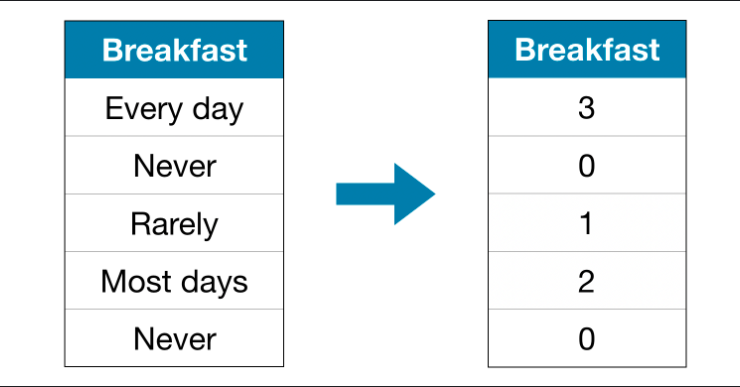

In [35]:
# Vuelvo a leer el archivo ya que anteriormente elimine todas las variables categoricas
X = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/train.csv', index_col='Id')
X_test = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/test.csv', index_col='Id')


X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# elimino columnas con valores faltantes para que sea mas facil
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# divido en conjunto de validacion y de entrenamiento
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [36]:
# Defino las columnas categoricas
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columnas que se pueden codificar correctamente
good_label_cols = [col for col in object_cols if
                   set(X_valid[col]).issubset(set(X_train[col]))]

# Columnas problematicas
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Condition2', 'RoofMatl', 'Functional']


In [37]:
# Importo ordinalencoder
from sklearn.preprocessing import OrdinalEncoder

# Elimino  columnas categoricas problematicas
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)


# Aplico ordinal encoder
ordinal_encoder = OrdinalEncoder()
label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])


In [39]:
print("MAE from Approach 2 (Ordinal Encoding):")
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Ordinal Encoding):
17098.01649543379


### **One-Hot Encoding**:


crea nuevas columnas que indican la presencia (o ausencia) de cada valor posible en los datos originales.

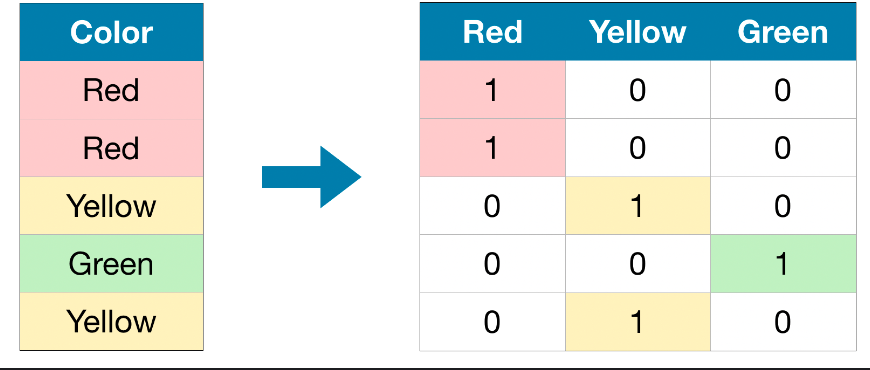

In [41]:
from sklearn.preprocessing import OneHotEncoder

# Aplico one-hot encoder a cada columna con datos categóricos
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Redefino los nuevos datos de entrenamiento y de validacion
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remuevo la columna categorica por una codificacion unica
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Agrego la columnas codificadas a las características
# numéricas
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Me aseguro que todas las columnas sean del tipo string
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
# Veo la presicion del modelo
print("MAE from Approach 3 (One-Hot Encoding):")
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
17837.82570776256


## Pipelines:

Con pipelines es una forma simple de mantener organizado el preprocesamiento de datos y modelado. Específicamente, un preprocesamiento y los pasos de modelado de pipelines permite que se pueda hacer todo el lo anterior como si fuera un solo paso.

Código de limpieza: contabilizar los datos en cada paso de preprocesamiento puede ponerse desordenado. Con pipelines, no se necesita realizar un seguimiento manual de los datos de entrenamiento y validación en cada paso.

Menos errores: hay menos oportunidades para aplicar mal un paso u olvidar un paso de preprocesamiento.

Más fácil de producir: puede ser sorprendentemente difícil hacer una transición de un modelo de un prototipo a algo desplegable a escala.

Más opciones para la validación del modelo: por ejemplo la validación cruzada.

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Releo archivo
X_full = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/train.csv', index_col='Id')
X_test_full = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/test.csv', index_col='Id')

# Remuevo la variable a predecir
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

#  Divido en variables de entrenamiento y de testeo
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y,
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=1)


# Selecciono las variables con cardinal relativamente bajo
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and
                    X_train_full[cname].dtype == "object"]

# selecciono las columnas numericas
numerical_cols = [cname for cname in X_train_full.columns if
                X_train_full[cname].dtype in ['int64', 'float64']]


my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [90]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
922,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,...,0,0,70,0,0,0,0,0,9,2008
521,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,220,114,210,0,0,0,0,8,2008
402,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,400,0,0,0,0,0,0,0,7,2006
281,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,575,0,84,0,196,0,0,0,1,2007
1402,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,398,100,75,0,0,0,0,0,4,2008


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocesamiento de las columnas numericas
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocesamiento de las columnas categoricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesamientos para datos numericos y categoricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [92]:

# Defino modelo
model = RandomForestRegressor(n_estimators=100, random_state=0)


In [93]:
# Preprocesamiento y código de modelado con pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprosecamiento de datos de entrenamiento, ajusto el modelo
clf.fit(X_train, y_train)

# Preprosecamiento de datos de validacion, obtenga la prediccion
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 16267.191917808219


El algoritmo de pepilines resulta ser util para limpiar el código de aprendizaje automático y evitar errores, y son especialmente útiles para flujos de trabajo con un preprocesamiento de datos sofisticado.

Se puede observar que se obtuvo un error menor, es decir la precision del modelo es mucho mejor.

## Validacion cruzada

En la validación cruzada, ejecutamos nuestro proceso de modelado en diferentes subconjuntos de los datos para obtener múltiples medidas de calidad del modelo.

Por ejemplo, podríamos comenzar dividiendo los datos en 5 piezas, cada el 20% del conjunto de datos completo. En este caso, decimos que hemos dividido los datos en 5 "pliegues".

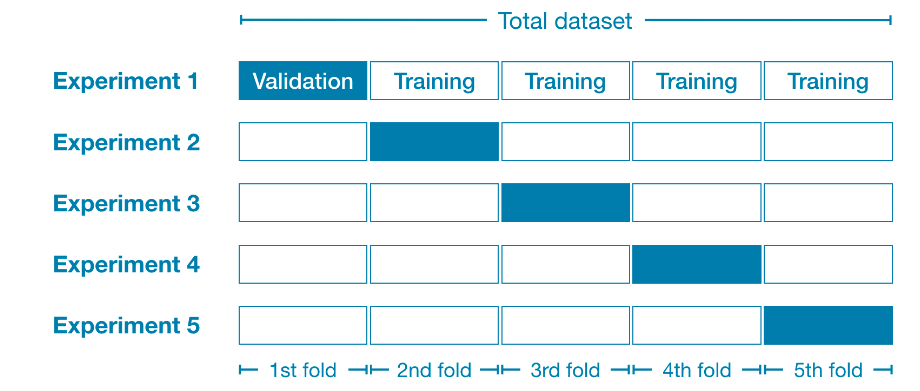

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/train.csv', index_col='Id')
test_data = pd.read_csv('/content/drive/MyDrive/Machine_learning_python/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [100]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [101]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


In [102]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [103]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [104]:
valores= [50, 100, 150, 200, 250, 300, 350, 400]

# Inicializamos un diccionario vacío
results = {}

# Iteramos sobre los valores y guardamos los resultados en el diccionario
for valor in valores:
    results[valor] = get_score(valor)


In [105]:
results = results

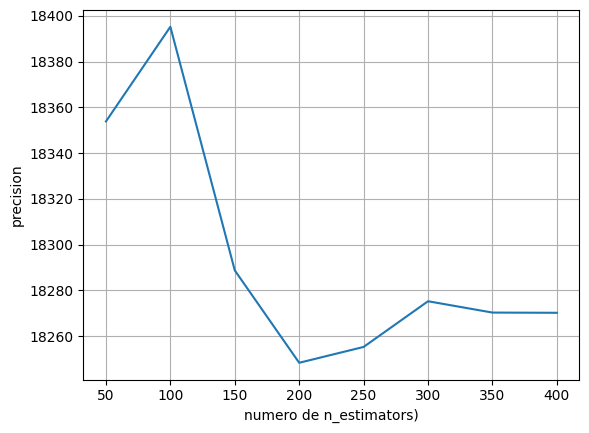

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('numero de n_estimators)')
plt.ylabel('precision')
plt.grid()
plt.show()

In [109]:
n_estimators_best =  min(results, key=results.get)
n_estimators_best

200